In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from scipy.stats import multivariate_normal
from sklearn.mixture import GaussianMixture
from matplotlib import pyplot as plt
from scipy.spatial.distance import cdist
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#Load Dataset

In [ ]:
X = pd.read_csv('UAS_ML2021_DATASET02.csv')

In [ ]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

#Iterating for best K

In [ ]:
for i in range(2,10):
    kmeans = KMeans(n_clusters = i)
    model = kmeans.fit(X)
    label = model.labels_
    score = silhouette_score(X, label)
    print(f'Silhoutte Score for n_clusters {i}: {score}')

Silhoutte Score for n_clusters 2: 0.6621705527181878
Silhoutte Score for n_clusters 3: 0.7356847709879415
Silhoutte Score for n_clusters 4: 0.595065322092602
Silhoutte Score for n_clusters 5: 0.5880894311427806
Silhoutte Score for n_clusters 6: 0.5032225001924523
Silhoutte Score for n_clusters 7: 0.43699444159503675
Silhoutte Score for n_clusters 8: 0.4445322578634643
Silhoutte Score for n_clusters 9: 0.44362270267355675


#Using cluster centers for mu

In [ ]:
kmeans = KMeans(n_clusters=3).fit(X)
kmeans.cluster_centers_

array([[ 1.197698  ,  1.32922733],
       [-1.47732521, -1.40637377],
       [ 0.12696481,  0.02289726]])

#Initialize Variables

In [ ]:
# Initialize Variables
mu = np.array([[0.12696481, 0.02289726],[1.47732521, -1.40637377],[1.197698,1.32922733]])
sigma = np.array([[[0.1, 0.1], [0.1, 0.1]], [[0.1, 0.1], [0.1, 0.1]], [[0.1, 0.1], [0.1, 0.1]]])
pi = np.array([1/3, 1/3, 1/3])
likelihood = np.zeros( (500, 3) )
resp = np.zeros((500,3))

#E-step and M-step combined

In [ ]:
before_likelihood = 0
after_likelihood = 0
first_likelihood = 0
first_resp = 0
for j in range(0,100):
    for i in range(3):
        likelihood[:,i] = multivariate_normal.pdf(X, mu[i], sigma[i], allow_singular=True)
        resp[:, i] = pi[i] * likelihood[:,i]

    log_likelihood = np.mean(np.log(np.sum(resp, axis = 1)))
    after_likelihood = log_likelihood  
      
    # normalize over all possible cluster assignments
    resp = resp / resp.sum(axis = 1, keepdims = 1) 
    if j==0:
        first_likelihood = log_likelihood
        first_resp = resp

    # Recalculate means and covariance
    for i in range(3):
        weight = resp[:, [i]]
        total_weight = weight.sum()
        mu[i] = (X * weight).sum(axis=0) / total_weight
        sigma[i] = np.cov(X.T, aweights=(weight/total_weight).flatten(), bias=True)

    pi = resp.mean(axis=0)
    
    print(f'Epoch {j}: {log_likelihood}')

    if after_likelihood == before_likelihood:
        before_epoch = j-1
        after_epoch = j
        break
    else:
        before_likelihood = after_likelihood

Epoch 0: -3.714122371676772
Epoch 1: -1.3796549175760606
Epoch 2: -1.3487314985987837
Epoch 3: -1.335662994191444
Epoch 4: -1.3076468636289462
Epoch 5: -1.231408714300187
Epoch 6: -1.079103306375735
Epoch 7: -0.980586600214425
Epoch 8: -0.926822276712797
Epoch 9: -0.8999434346972778
Epoch 10: -0.8654009261406969
Epoch 11: -0.8119447693991757
Epoch 12: -0.7857082519270199
Epoch 13: -0.7853593549440786
Epoch 14: -0.7853588130866453
Epoch 15: -0.7853587699625408
Epoch 16: -0.7853587664927582
Epoch 17: -0.7853587662136335
Epoch 18: -0.7853587661911804
Epoch 19: -0.7853587661893747
Epoch 20: -0.7853587661892296
Epoch 21: -0.7853587661892175
Epoch 22: -0.7853587661892171
Epoch 23: -0.7853587661892171


In [ ]:
print(f'First Log Likelihood: {first_likelihood}')
print(f'First Responsibility:\n{first_resp}')

First Log Likelihood: -3.714122371676772
First Responsibility:
[[4.84430613e-03 4.17485364e-03 7.75762505e-01]
 [2.92423844e-04 2.40631873e-04 1.30978540e-01]
 [1.19326566e-01 1.13584221e-01 1.32520161e-07]
 ...
 [4.32901360e-02 9.87415161e-02 3.53004177e-33]
 [1.61673391e-02 5.04030985e-02 1.68734543e-47]
 [1.31772019e-01 1.29363997e-01 3.59384905e-09]]


In [ ]:
print("Pi: ", pi)
print()
print("Means :\n", mu)
print()
print("Covariances :\n", sigma)

Pi:  [0.49995615 0.25000072 0.25004313]

Means :
 [[ 0.13682024  0.02927173]
 [-1.47731854 -1.40636764]
 [ 1.20349865  1.34760085]]

Covariances :
 [[[0.1186252  0.02261994]
  [0.02261994 0.05547854]]

 [[0.04634793 0.03839655]
  [0.03839655 0.04463047]]

 [[0.04784261 0.03834003]
  [0.03834003 0.04848321]]]


#Looped until point of convergence

In [ ]:
print(f'Converges at Epoch {before_epoch} & {after_epoch} at Log Likelihood of : {log_likelihood}')
print('Responsibility :\n', resp)

Converges at Epoch 22 & 23 at Log Likelihood of : -0.7853587661892171
Responsibility :
 [[4.13551184e-08 1.13437915e-38 9.99999959e-01]
 [4.64313439e-13 4.60299679e-51 1.00000000e+00]
 [9.99999954e-01 2.47396159e-12 4.56239646e-08]
 ...
 [2.20436116e-12 1.00000000e+00 2.32874947e-40]
 [1.13861795e-16 1.00000000e+00 1.85545784e-51]
 [9.99999999e-01 1.94780275e-10 9.49692227e-10]]


#Validation with Scikit Learn

In [ ]:
gmm = GaussianMixture(n_components=3).fit(X)
lh = gmm.score(X)
print("Log Likelihood using Sklearn : ", lh)

Log Likelihood using Sklearn :  -0.7853616483298623


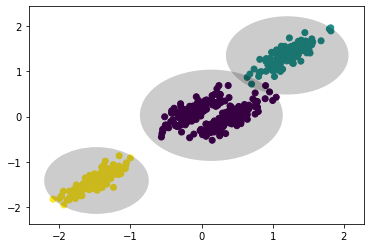

In [ ]:
plt.gca().scatter(X[:, 0], X[:, 1], c=gmm.predict(X))

centers = gmm.means_
radii = [cdist(X[gmm.predict(X) == i], [center]).max() for i, center in enumerate(centers)]

for c, r in zip(centers, radii):
    plt.gca().add_patch(plt.Circle(c, r, fc='#000000', lw=3, alpha=0.2, zorder=1))
plt.show()